In [3]:
pip install opencv-python


   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 975.2 kB/s eta 0:00:40
   ---------------------------------------- 0.1/38.8 MB 1.2 MB/s eta 0:00:33
   ---------------------------------------- 0.2/38.8 MB 1.2 MB/s eta 0:00:32
   ---------------------------------------- 0.2/38.8 MB 1.1 MB/s eta 0:00:36
   ---------------------------------------- 0.3/38.8 MB 1.0 MB/s eta 0:00:37
   ---------------------------------------- 0.3/38.8 MB 1.2 MB/s eta 0:00:34
   ---------------------------------------- 0.4/38.8 MB 1.1 MB/s eta 0:00:34
   ---------------------------------------- 0.4/38.8 MB 1.1 MB/s eta 0:00:36
   ---------------------------------------- 0.4/38.8 MB 1.1 MB/s eta 0:00:36
    --------------------------------------- 0.5/38.8 MB 1.1 MB/s eta 0:00:36
    --------------------------------------- 0.5/38.8 MB 1.0 MB/s eta 0:00:38
    -------

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
import cv2

# Generator network
def build_generator():
    model = Sequential([
        Input(shape=(100,)),
        Dense(256, activation='relu'),
        Dense(512, activation='relu'),
        Dense(1024, activation='relu'),
        Dense(28 * 28, activation='sigmoid'),  # Adjust output shape to match image size
        Reshape((28, 28))
    ])
    return model

# Discriminator network
def build_discriminator():
    model = Sequential([
        Input(shape=(28, 28)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model


# Combined GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(gan_input, gan_output)
    gan.compile(loss='binary_crossentropy', optimizer=Adam())
    return gan

# Initialize models
generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)


In [13]:
def train_gan(generator, discriminator, gan, epochs=100, batch_size=128, sample_interval=100):
    # Load and preprocess data (replace with your data loading and preprocessing)
    # data = ...

    for epoch in range(epochs):
        # ---------------------
        #  Train Discriminator
        # ---------------------

        # Select a random batch of images
        idx = np.random.randint(0, data.shape[0], batch_size)
        real_images = data[idx]

        # Generate a batch of fake images
        noise = np.random.normal(0, 1, (batch_size, 100))
        fake_images = generator.predict(noise)

        # Label real and fake images
        real_labels = np.ones((batch_size, 1))
        fake_labels = np.zeros((batch_size, 1))

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train Generator
        # ---------------------

        noise = np.random.normal(0, 1, (batch_size, 100))

        # Train the generator (via the GAN model)
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        # Print progress
        print(f'Epoch {epoch}, [D loss: {d_loss[0]}, acc.: {100*d_loss[1]:.2f}%], [G loss: {g_loss}]')

        # If at sample interval, save generated image samples
        if epoch % sample_interval == 0:
            save_generated_images(generator, epoch)

def save_generated_images(generator, epoch, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = np.random.normal(0, 1, (examples, 100))
    generated_images = generator.predict(noise)

    plt.figure(figsize=figsize)
    for i in range(examples):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'generated_image_epoch_{epoch}.png')
    plt.close()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


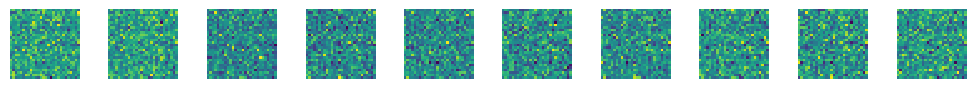

In [15]:
# Generate new images after training
def generate_images(generator, examples=10, figsize=(10, 1)):
    noise = np.random.normal(0, 1, (examples, 100))
    generated_images = generator.predict(noise)

    plt.figure(figsize=figsize)
    for i in range(examples):
        plt.subplot(1, examples, i+1)
        plt.imshow(generated_images[i], interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage to generate images
generate_images(generator, examples=10)


In [43]:
import cv2

def overlay_product_on_person(person_image, product_image, position=(100, 200)):
    # Resize product image to fit on person image
    product_resized = cv2.resize(product_image, (200, 200))

    # Overlay product on person at specified position
    person_image[position[0]:position[0]+product_resized.shape[0], 
                 position[1]:position[1]+product_resized.shape[1]] = product_resized

    return person_image

# Example usage
person_image = cv2.imread('product_image.png')
product_image = cv2.imread('gowri solo.jpg')

result_image = overlay_product_on_person(person_image, product_image, position=(50, 50))

# Display result
cv2.imshow('Virtual Try-On', result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
